# <U>Notebook Table Of Contents<u>
**1. Comparisons - Main Class Classification**<br>
**2. Comparisons - Sub Class Classification**<br>
**3. Validation of Best Model against Unseen Data**<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.1 Main Class Classification<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Sub-Class Classification<br>

In [1]:
import pandas as pd
import numpy as np

## plotting modules
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

#Machine Learning
from sklearn.metrics import classification_report
from sklearn import metrics
from joblib import dump, load
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
from keras.utils import to_categorical
from joblib import dump, load

#supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
##load in comparison metrics for all models
ml_main_class = pd.read_csv('../data/derived_tables/model_comparisons/ml_main_class.csv', index_col=0)
ml_sub_class = pd.read_csv('../data/derived_tables/model_comparisons/ml_sub_class.csv', index_col=0)
nn_main_class = pd.read_csv('../data/derived_tables/model_comparisons/nn_main_class.csv', index_col=0)
nn_sub_class = pd.read_csv('../data/derived_tables/model_comparisons/nn_sub_class.csv', index_col=0)

# 1. Comparisons - Main Class Classification

In [4]:
ml_main_class = ml_main_class.sort_values('accuracy').reset_index().drop(columns='index')
ml_main_class

,model,accuracy,f1_score,QWK,MAE,sp_class_error
0,rf_pca,0.907898,0.905438,0.976868,0.093861,0.093861
1,svm_pca,0.909640,0.910606,0.971345,0.099533,0.099533
2,rf,0.909898,0.912972,0.977477,0.094122,0.094122
3,svm,0.911017,0.911902,0.971668,0.098157,0.098157
4,rf_bal_pca,0.915272,0.919342,0.987231,0.079321,0.079321
5,rf_bal,0.924417,0.924997,0.989403,0.078349,0.078349
6,svm_bal_pca,0.926267,0.927005,0.989658,0.076037,0.076037
7,svm_bal,0.934558,0.934965,0.987058,0.073277,0.073277


In [5]:
nn_main_class = nn_main_class.sort_values('accuracy').reset_index().drop(columns='index')
nn_main_class

,model,accuracy,f1_score,QWK,MAE,sp_class_error
0,mlp_bal,0.845159,0.850035,0.979773,0.158067,0.158067
1,mlp,0.847241,0.860171,0.965598,0.155511,0.155511
2,mlp_pca,0.892365,0.901315,0.976213,0.102743,0.102743
3,mlp_bal_pca,0.899009,0.904673,0.978323,0.101443,0.101443
4,cnn,0.912667,0.913977,0.978132,0.094626,0.094626
5,cnn_bal,0.938569,0.938362,0.989441,0.072735,0.072735


In [6]:
#merging both main class datasets
all_main_class = pd.concat([ml_main_class, nn_main_class])

In [7]:
#resorting by accuracy
all_main_class = all_main_class.sort_values('accuracy').reset_index().drop(columns='index')
all_main_class.head()

,model,accuracy,f1_score,QWK,MAE,sp_class_error
0,mlp_bal,0.845159,0.850035,0.979773,0.158067,0.158067
1,mlp,0.847241,0.860171,0.965598,0.155511,0.155511
2,mlp_pca,0.892365,0.901315,0.976213,0.102743,0.102743
3,mlp_bal_pca,0.899009,0.904673,0.978323,0.101443,0.101443
4,rf_pca,0.907898,0.905438,0.976868,0.093861,0.093861


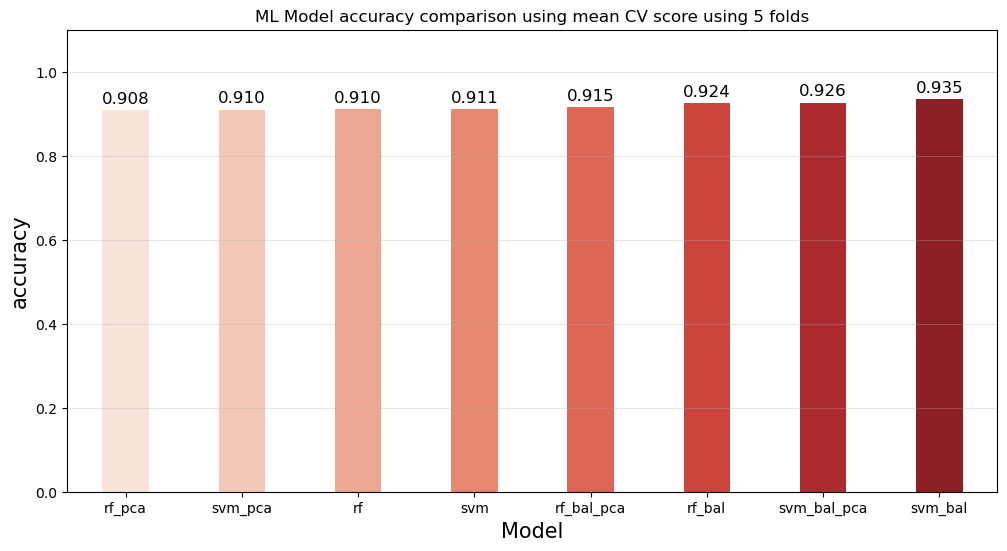

In [114]:
#plotting the accuracies
plt.figure(figsize=(12,6))
ax = sns.barplot(x='model',y='accuracy',data=ml_main_class, width=.4, palette=("Reds"))
plt.grid(axis='y',alpha=.3)
plt.title('ML Model accuracy comparison using mean CV score using 5 folds')
plt.xlabel('Model', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
ax.set_ylim(0, 1.1)
plt.show()

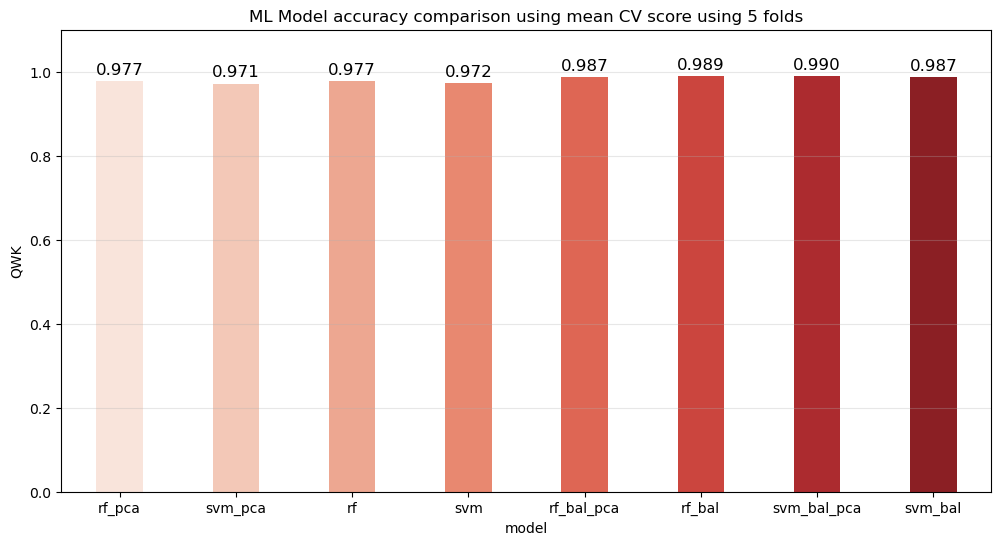

In [113]:
#plotting the accuracies
plt.figure(figsize=(12,6))
ax = sns.barplot(x='model',y='QWK',data=ml_main_class, width=.4, palette=("Reds"))
plt.grid(axis='y',alpha=.3)
plt.title('ML Model accuracy comparison using mean CV score using 5 folds')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
ax.set_ylim(0, 1.1)
plt.show()

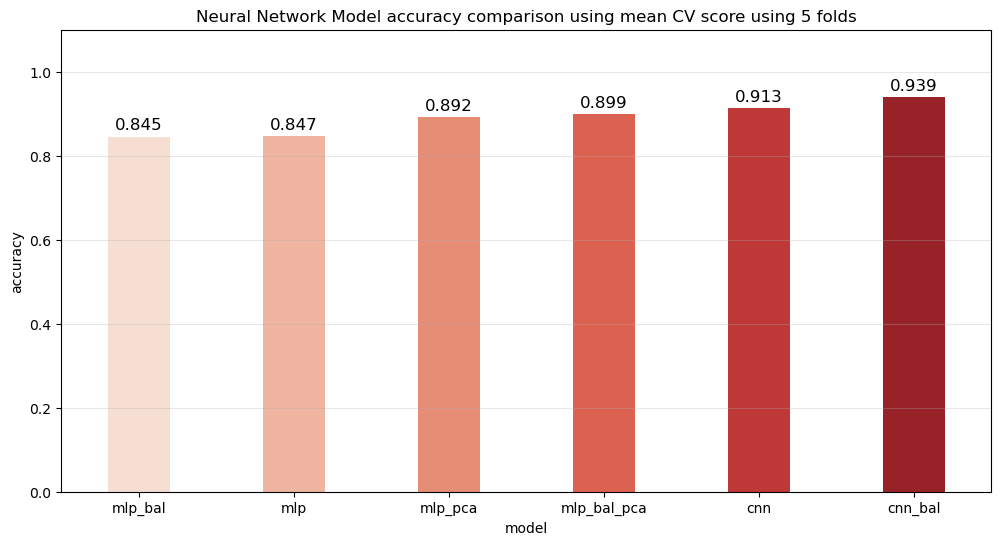

In [112]:
#plotting the accuracies
plt.figure(figsize=(12,6))
ax = sns.barplot(x='model',y='accuracy', data=nn_main_class, width=.4, palette=("Reds"))
plt.grid(axis='y',alpha=.3)
plt.title('Neural Network Model accuracy comparison using mean CV score using 5 folds')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
ax.set_ylim(0, 1.1)
plt.show()

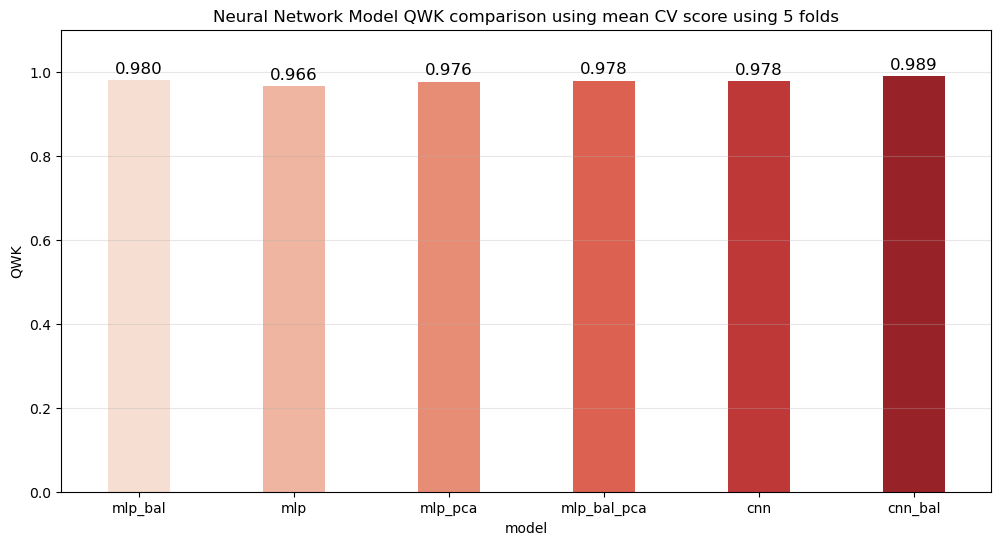

In [111]:
#plotting the accuracies
plt.figure(figsize=(12,6))
ax = sns.barplot(x='model', y='QWK', data=nn_main_class, width=.4, palette=("Reds"))
plt.grid(axis='y',alpha=.3)
plt.title('Neural Network Model QWK comparison using mean CV score using 5 folds')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
ax.set_ylim(0, 1.1)
plt.show()

**creating a bar chart of the top performing models**

In [116]:
all_main_class.head()
all_main

,model,accuracy,f1_score,QWK,MAE,sp_class_error
0,cnn_bal,0.938569,0.938362,0.989441,0.072735,0.072735
1,svm_bal,0.934558,0.934965,0.987058,0.073277,0.073277
2,svm_bal_pca,0.926267,0.927005,0.989658,0.076037,0.076037
3,rf_bal,0.924417,0.924997,0.989403,0.078349,0.078349
4,rf_bal_pca,0.915272,0.919342,0.987231,0.079321,0.079321


In [121]:
all_main_class[-5:]

,model,accuracy,f1_score,QWK,MAE,sp_class_error
9,rf_bal_pca,0.915272,0.919342,0.987231,0.079321,0.079321
10,rf_bal,0.924417,0.924997,0.989403,0.078349,0.078349
11,svm_bal_pca,0.926267,0.927005,0.989658,0.076037,0.076037
12,svm_bal,0.934558,0.934965,0.987058,0.073277,0.073277
13,cnn_bal,0.938569,0.938362,0.989441,0.072735,0.072735


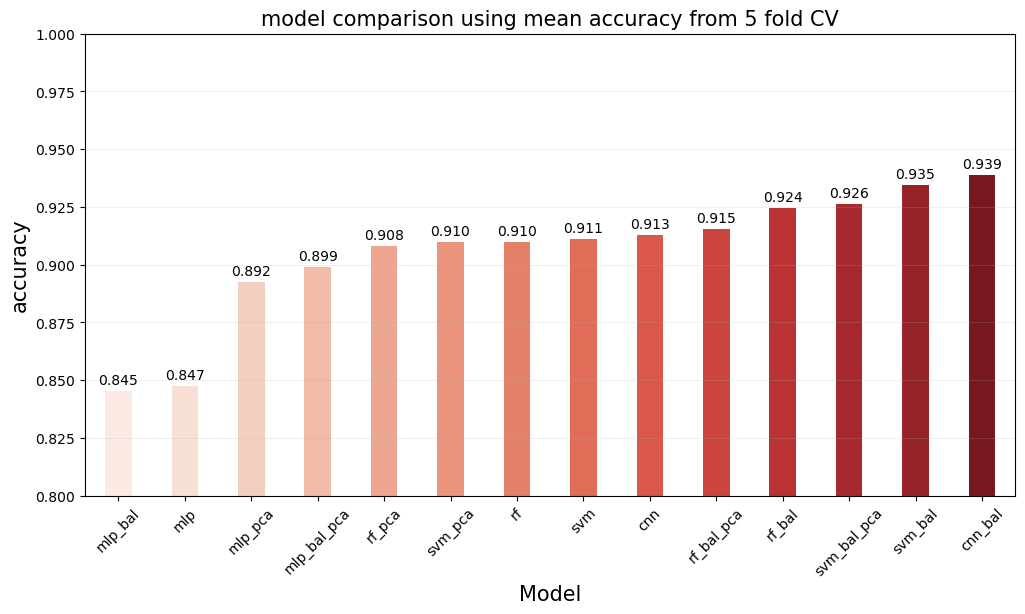

In [135]:
#plotting the accuracies
plt.figure(figsize=(12,6))
ax = sns.barplot(x='model', y='accuracy', data=all_main_class[:], width=.4, palette=("Reds"))
plt.grid(axis='y',alpha=.2)
plt.title('model comparison using mean accuracy from 5 fold CV', fontsize=15)
plt.xlabel('Model', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
ax.set_ylim(.8, 1)
plt.show()

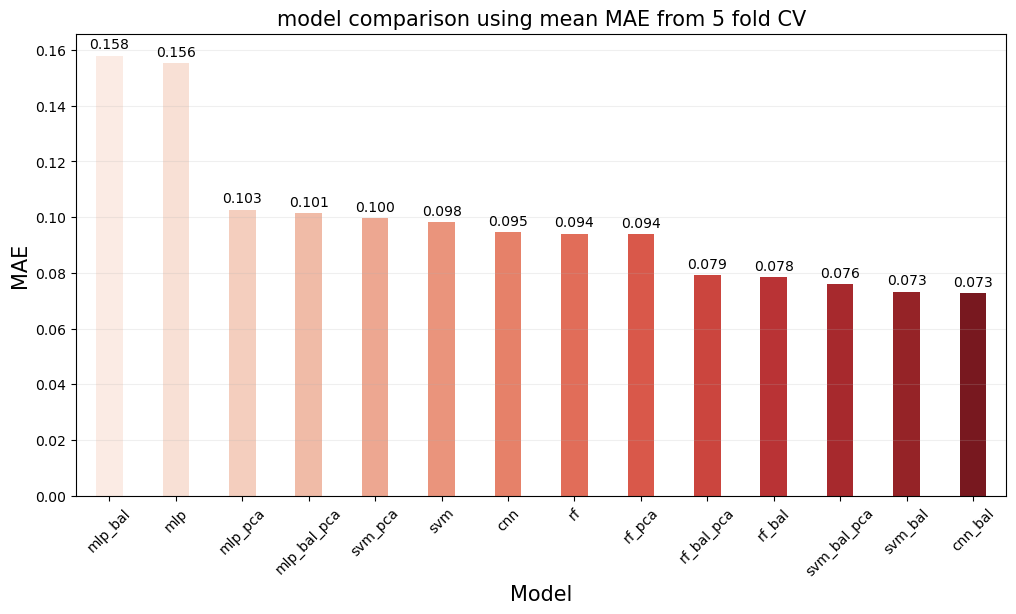

In [178]:
#plotting the accuracies
plt.figure(figsize=(12,6))
ax = sns.barplot(x='model', y='MAE', data=all_main_class.sort_values('MAE', ascending=False),
                 width=.4, palette=("Reds"))
plt.grid(axis='y',alpha=.2)
plt.title('model comparison using mean MAE from 5 fold CV', fontsize=15)
plt.xlabel('Model', fontsize=15)
plt.ylabel('MAE', fontsize=15)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

# 2. Comparisons - Sub Class Classification

In [165]:
ml_sub_class = ml_sub_class.sort_values('accuracy').reset_index().drop(columns='index')
ml_sub_class

,model,accuracy,f1_score,QWK,MAE,sp_class_error
0,svm_reg,0.421102,0.468858,0.992360,1.012841,1.012841
1,svm_reg_bal,0.423255,0.472922,0.992458,0.991743,0.991743
2,rf_reg,0.453673,0.488007,0.991230,1.012841,1.012841
3,rf_reg_bal,0.456336,0.498910,0.990974,1.026684,1.026684
4,rf,0.494316,0.505249,0.989518,1.022479,1.022479
5,svm,0.529816,0.522997,0.985308,1.025240,1.025240
6,rf_bal,0.552345,0.544333,0.992080,0.895732,0.895732
7,svm_bal,0.632345,0.659926,0.995403,0.704970,0.704970


In [166]:
nn_sub_class = nn_sub_class.sort_values('accuracy').reset_index().drop(columns='index')
nn_sub_class

,model,accuracy,f1_score,QWK,MAE,sp_class_error
0,cnn_reg_bal,0.134117,0.131654,0.980728,2.341361,2.341361
1,cnn_reg,0.272936,0.310618,0.990851,1.334862,1.334862
2,cnn,0.524404,0.520275,0.991354,1.059633,1.059633
3,cnn_bal,0.603655,0.634361,0.993052,0.736563,0.736563


In [167]:
#merging both main class datasets
all_sub_class = pd.concat([ml_sub_class, nn_sub_class])

In [168]:
#resorting by accuracy
all_sub_class = all_sub_class.sort_values('accuracy').reset_index().drop(columns='index')
all_sub_class.head()

,model,accuracy,f1_score,QWK,MAE,sp_class_error
0,cnn_reg_bal,0.134117,0.131654,0.980728,2.341361,2.341361
1,cnn_reg,0.272936,0.310618,0.990851,1.334862,1.334862
2,svm_reg,0.421102,0.468858,0.992360,1.012841,1.012841
3,svm_reg_bal,0.423255,0.472922,0.992458,0.991743,0.991743
4,rf_reg,0.453673,0.488007,0.991230,1.012841,1.012841


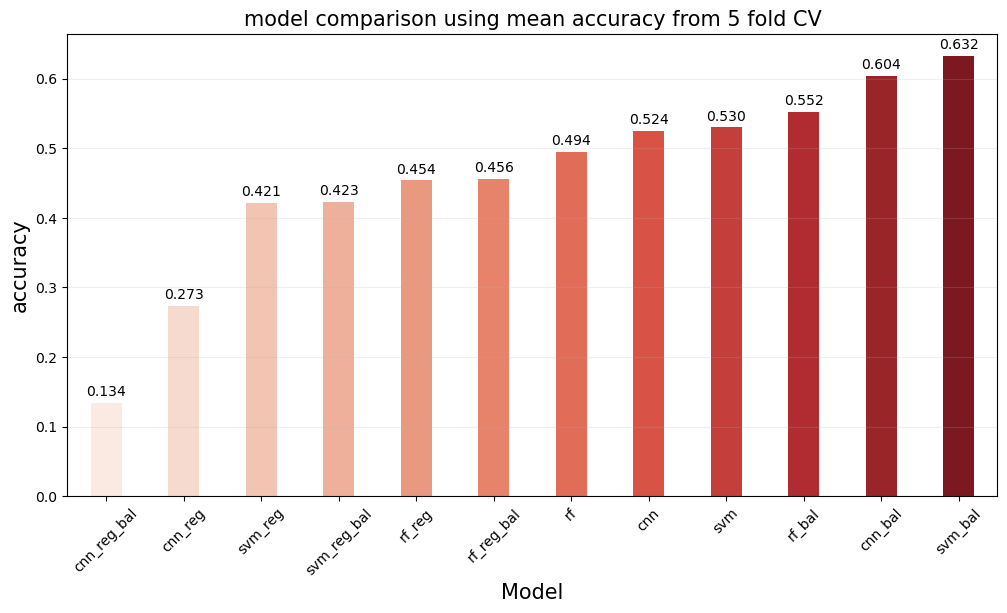

In [171]:
#plotting the accuracies
plt.figure(figsize=(12,6))
ax = sns.barplot(x='model', y='accuracy', data=all_sub_class[:], width=.4, palette=("Reds"))
plt.grid(axis='y',alpha=.2)
plt.title('model comparison using mean accuracy from 5 fold CV', fontsize=15)
plt.xlabel('Model', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
#ax.set_ylim(.8, 1)
plt.show()

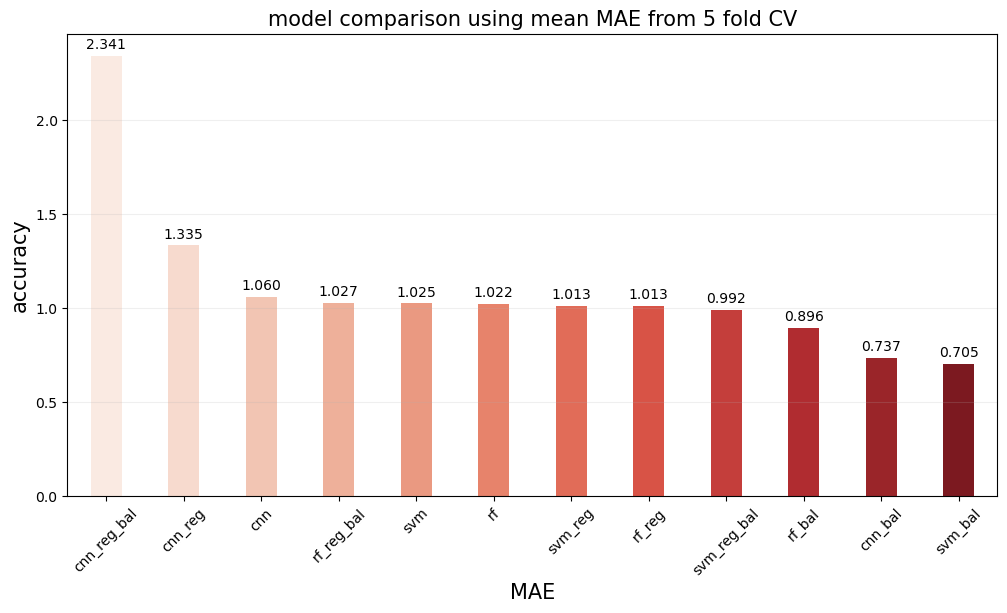

In [177]:
#plotting the accuracies
plt.figure(figsize=(12,6))
ax = sns.barplot(x='model', y='MAE', data=all_sub_class.sort_values('MAE', ascending=False),
                 width=.4, palette=("Reds"))
plt.grid(axis='y',alpha=.2)
plt.title('model comparison using mean MAE from 5 fold CV', fontsize=15)
plt.xlabel('MAE', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

-------- 

# 3. Validation of Best Model against Unseen Data
For this section a sample of spectra were obtained from a recently published astronomical database; Sloan Digital Sky Survey (SDSS). This section will seek to explore the usablity of a deployed model when applied to a large scale astronomical survey.

In [8]:
#defining function to assist with evaluating results
def get_sdss_metrics(y, predictions):
    #precision
    f1 = metrics.f1_score(y, predictions, average='weighted')
    #accuracy
    accuracy = metrics.accuracy_score(y, predictions)
    #quadratic weighted kappa
    qwk = metrics.cohen_kappa_score(y, predictions, weights='quadratic')
    #mean absolute error
    mae = metrics.mean_absolute_error(y, predictions)

    sdss_metrics = pd.DataFrame({'accuracy':[accuracy], 
                                'f1_score':[f1],
                                'QWK':[qwk], 
                                'MAE':[mae]})

    return sdss_metrics

In [9]:
#defining function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    #plotting the confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)

    class_names=['O', 'B', 'A', 'F', 'G', 'K', 'M']

    fig, ax = plt.subplots()
    sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g',
                xticklabels=class_names,yticklabels=class_names,cbar=False)
    plt.title(f'Confusion matrix: {model_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show() 

In [10]:
#defining function to plot scatter plot
def plot_scatter_plot(y_test, y_pred, model_name):
    main_class_results = pd.DataFrame({'actual_sub_class':y_test, 
                                       'predicted_sub_class':y_pred})
    plt.figure(figsize=(10,6))
    
    scatter_plot = sns.scatterplot(data=main_class_results, x='predicted_sub_class', y='actual_sub_class', 
                                   label='predictions')
    
    plt.plot([main_class_results['actual_sub_class'].min(), main_class_results['actual_sub_class'].max()],
             [main_class_results['actual_sub_class'].min(), main_class_results['actual_sub_class'].max()],
             color='red', linestyle='--', linewidth=2, label='true positive diagonal')
    
    plt.title(f'Scatter plot of actual sub-class vs predicted sub-class : {model_name}')
    plt.ylabel('Actual sub class')
    plt.xlabel('Predicted sub class')
    plt.legend(True)
    plt.show()

## 3.1 Main Class Classification: 
Best model as determined from experiments: **CNN using balanced dataset**. <br>
The below code will try both model that was trained on balaced dataset and imbalanced dataset to analyse if synthetic data provides better results when tested on unseen data. 

In [142]:
#Loading the models 
cnn_model_main = load_model('../Deep_Learning/saved_models/cnn_model_main.h5')
cnn_model_main_bal = load_model('../Deep_Learning/saved_models/cnn_model_main_bal.h5')

In [144]:
#loading in the SDSS dataset with MK main class label
sdss_main = pd.read_csv('../data/derived_tables/X_y_data/sdss_main.csv', index_col=0)
sdss_main.head()

,main_class,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,...,flux_3498,flux_3499,flux_3500,flux_3501,flux_3502,flux_3503,flux_3504,flux_3505,flux_3506,flux_3507
0,0,4.612751,4.629189,4.633437,4.622186,4.608599,4.597950,4.585971,4.575353,4.570194,...,0.193636,0.202376,0.212885,0.222521,0.229137,0.231363,0.229384,0.224177,0.217300,0.209690
1,0,4.476836,4.496675,4.481870,4.430263,4.373076,4.344155,4.354936,4.389069,4.414980,...,0.262390,0.255652,0.249205,0.244060,0.240372,0.238209,0.238330,0.241704,0.249239,0.260263
2,0,2.143477,2.123188,2.102329,2.096095,2.105726,2.121027,2.127164,2.114831,2.096489,...,0.533097,0.531302,0.528643,0.525355,0.521910,0.518842,0.516595,0.515392,0.515187,0.515745
3,1,2.319141,2.320971,2.322630,2.329044,2.342198,2.358534,2.377553,2.401723,2.426607,...,0.555787,0.555670,0.555452,0.555028,0.554267,0.553063,0.551397,0.549396,0.547353,0.545647
4,1,1.076266,1.072419,1.069726,1.077788,1.092809,1.102694,1.109586,1.119324,1.124978,...,0.699370,0.699333,0.700953,0.703704,0.706699,0.709047,0.710228,0.710135,0.709088,0.707500


In [145]:
#splitting into independent/input (X) and dependent/target (Y) variables
X = sdss_main.loc[:, sdss_main.columns != 'main_class']
y = sdss_main.loc[:, 'main_class']

In [146]:
#converting to array of arrays to be compatible with CNN architecture
X = X.values
y = y.values

In [149]:
#reshaping X to be consistent with what the CNN was trained with
X_cnn = X.reshape((X.shape[0], X.shape[1], 1))

In [150]:
#making predictions using both models
main_model_pred = cnn_model_main.predict(X_cnn)
main_bal_model_pred = cnn_model_main_bal.predict(X_cnn)

31/31 [==============================] - 2s 39ms/step


In [151]:
#converting predictions to actual classes from probability list
main_model_pred = np.argmax(main_model_pred, axis=1)
main_bal_model_pred = np.argmax(main_bal_model_pred, axis=1)

In [152]:
main_class_metric_imbal = get_sdss_metrics(y, main_model_pred)
main_class_metric_bal = get_sdss_metrics(y, main_bal_model_pred)

In [153]:
main_class_metric_imbal

,accuracy,f1_score,QWK,MAE
0,0.690229,0.661418,0.866701,0.361746


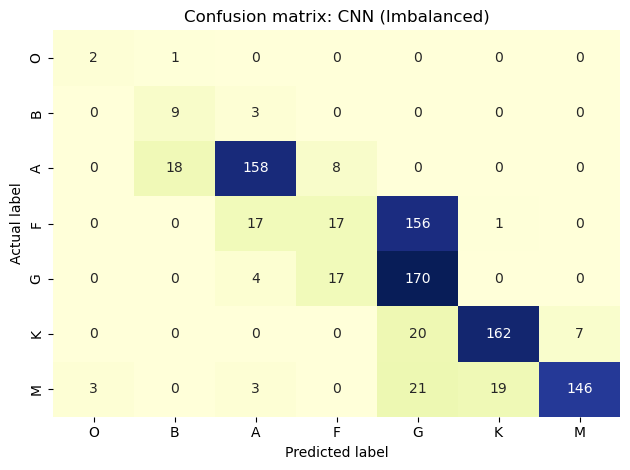

In [154]:
plot_confusion_matrix(y, main_model_pred, 'CNN (Imbalanced)')

In [155]:
main_class_metric_bal

,accuracy,f1_score,QWK,MAE
0,0.650728,0.645184,0.878453,0.389813


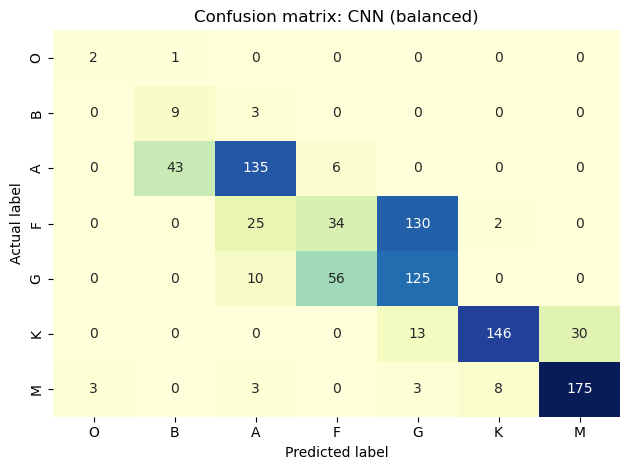

In [156]:
plot_confusion_matrix(y, main_bal_model_pred, 'CNN (balanced)')

In [157]:
main_class_df = pd.concat([main_class_metric_bal, main_class_metric_imbal])

In [158]:
main_class_df['model'] = ['cnn_balanced', 'cnn_imbalanced']

In [160]:
main_class_df = main_class_df[['model','accuracy', 'f1_score', 'QWK', 'MAE']]

In [161]:
main_class_df

,model,accuracy,f1_score,QWK,MAE
0,cnn_balanced,0.650728,0.645184,0.878453,0.389813
0,cnn_imbalanced,0.690229,0.661418,0.866701,0.361746


-------------
## 3.2 Sub-Class Classification: 

In [11]:
# Load model
svm = load('saved_models/svm.py')
svm_bal = load('saved_models/svm_bal.py')

In [12]:
#loading in the SDSS dataset with sub-class labels
sdss_sub = pd.read_csv('../data/derived_tables/X_y_data/sdss_sub.csv', index_col=0)
sdss_sub.head()

,sub_class,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,...,flux_3498,flux_3499,flux_3500,flux_3501,flux_3502,flux_3503,flux_3504,flux_3505,flux_3506,flux_3507
0,11,2.319141,2.320971,2.322630,2.329044,2.342198,2.358534,2.377553,2.401723,2.426607,...,0.555787,0.555670,0.555452,0.555028,0.554267,0.553063,0.551397,0.549396,0.547353,0.545647
1,11,1.076266,1.072419,1.069726,1.077788,1.092809,1.102694,1.109586,1.119324,1.124978,...,0.699370,0.699333,0.700953,0.703704,0.706699,0.709047,0.710228,0.710135,0.709088,0.707500
2,11,2.799091,2.810997,2.819013,2.831406,2.857356,2.896342,2.940334,2.977965,2.998614,...,0.508048,0.505507,0.503807,0.503198,0.503417,0.503989,0.504419,0.504406,0.503886,0.502886
3,11,2.514566,2.542403,2.549494,2.541632,2.532339,2.526428,2.526824,2.536020,2.552435,...,0.526584,0.526495,0.526734,0.527488,0.528404,0.528879,0.528241,0.526183,0.522896,0.518998
4,11,1.694404,1.718009,1.747110,1.776658,1.800411,1.815148,1.826831,1.839704,1.849551,...,0.474820,0.474415,0.473456,0.472040,0.470516,0.469306,0.468764,0.468992,0.469801,0.470964


In [13]:
#splitting into independent/input (X) and dependent/target (Y) variables
X = sdss_sub.loc[:, sdss_sub.columns != 'sub_class']
y = sdss_sub.loc[:, 'sub_class']

In [14]:
#converting to array of arrays to be compatible with CNN architecture
X = X.values
y = y.values

In [15]:
#making predictions using models
svm_pred = svm.predict(X)
svm_pred_bal = svm_bal.predict(X)

In [16]:
#creating dataframes for models
sub_class_svm_imbal = get_sdss_metrics(y, svm_pred)
sub_class_svm_bal = get_sdss_metrics(y, svm_pred_bal)

In [17]:
sub_class_df = pd.concat([sub_class_svm_bal, sub_class_svm_imbal])

In [18]:
sub_class_df['model'] = ['svm_balanced', 'svm_imbalanced']

In [19]:
sub_class_df = sub_class_df[['model','accuracy', 'f1_score', 'QWK', 'MAE']]

In [20]:
sub_class_df

,model,accuracy,f1_score,QWK,MAE
0,svm_balanced,0.200209,0.234779,0.901373,3.700730
0,svm_imbalanced,0.279458,0.313373,0.895423,3.718457


In [21]:
#defining function to plot scatter plot
def plot_scatter_plot(y_test, y_pred, model_name):
    #adding 5 to each prediction due to 5 missing classes (i.e O0 - O4) when encoding
    class_results = pd.DataFrame({'actual_sub_class':y_test + 5, 
                                       'predicted_sub_class':y_pred + 5})
    
    #determining the density of each prediction/actual combintation 
    results = class_results.groupby(['actual_sub_class', 'predicted_sub_class']).size().reset_index(name='counts')
    
    plt.figure(figsize=(12,8))
    
    scatter_plot = sns.scatterplot(data=results, x='predicted_sub_class', y='actual_sub_class',
                                   hue='counts', palette='dark:blue_r', label='predictions',legend=None)
    
    plt.plot([0,70],[0,70],
             color='red', linestyle='--', linewidth=1, label='true positive diagonal')
    
    mk_classes = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
    tick_positions = [0, 10, 20, 30, 40, 50, 60]
    plt.xticks(tick_positions, mk_classes)
    plt.yticks(tick_positions, mk_classes)
    
    plt.title(f'Scatter plot of actual sub-class vs predicted sub-class : {model_name}', fontsize=15)
    plt.ylabel('Actual sub class', fontsize=15)
    plt.xlabel('Predicted sub class', fontsize=15)
    plt.legend(loc=(1.01,0.9))
    plt.grid(True, alpha = 0.4)
    plt.xlim(0,70)
    plt.ylim(0,70)
    plt.show()

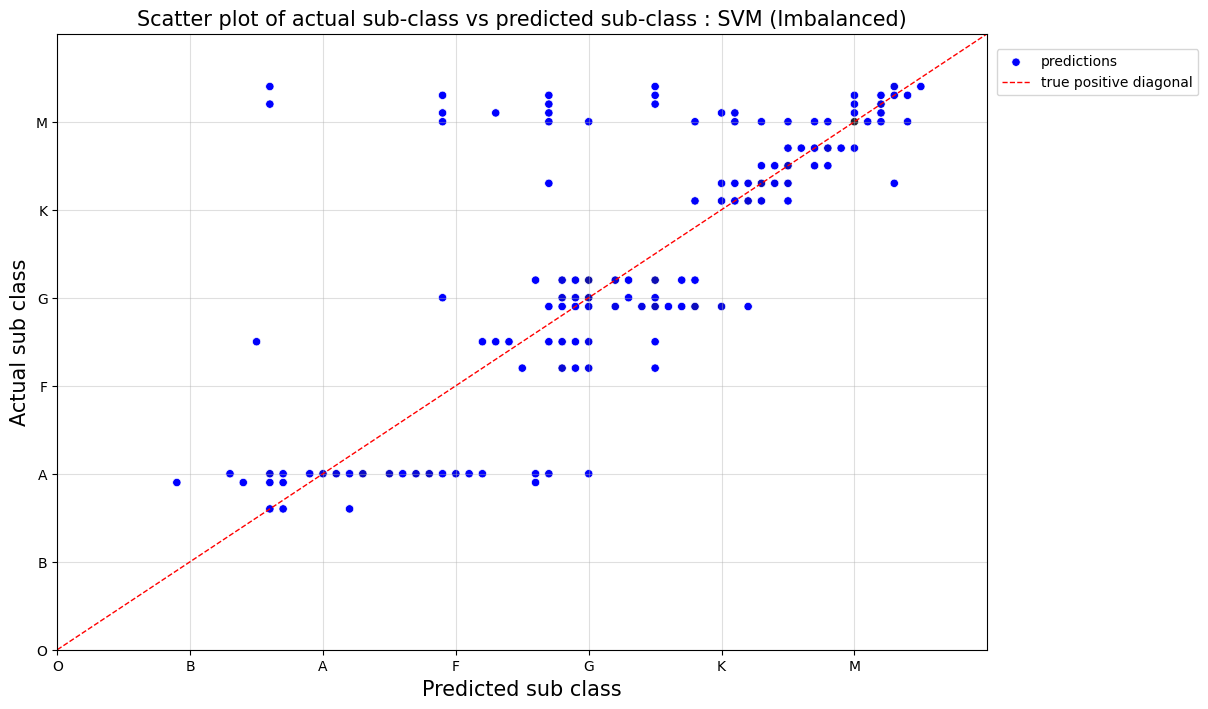

In [22]:
plot_scatter_plot(y, svm_pred, 'SVM (Imbalanced)')

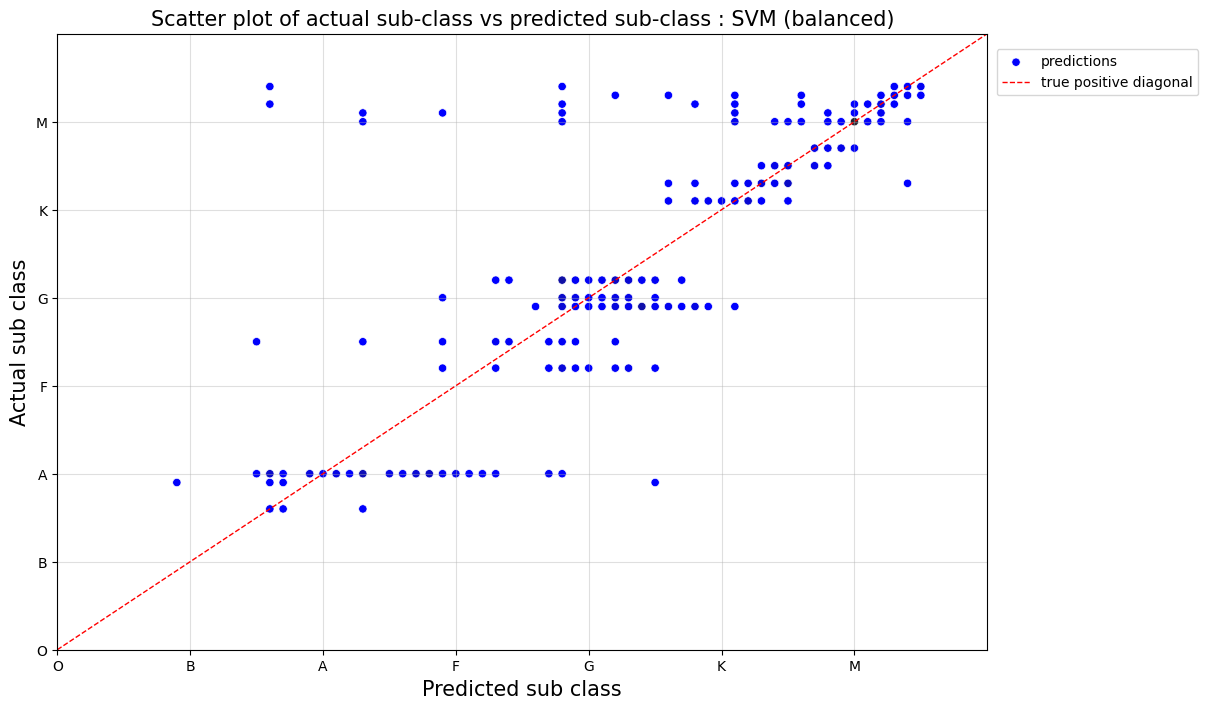

In [23]:
plot_scatter_plot(y, svm_pred_bal, 'SVM (balanced)')